In [ ]:
# from gensim import corpora, models, similarities
# from collections import defaultdict
# from pprint import pprint
# from openpyxl import Workbook, load_workbook

# wb = load_workbook(filename = 'data/GICS_map2014.xlsx')
# sheet_list = wb['Descriptions']
# file_ob = open("Description.txt",'a')
# for i in range(6,346,2):
#     s = 'H' + str(i)
#     s1 = 'H' + str(i+1)
#     print(sheet_list[s].value + ": " + sheet_list[s1].value) 
#     file_ob.write(sheet_list[s].value + ": " + sheet_list[s1].value + "\n")
# file_ob.close()

# file2 = open("Description.txt",'r')
# docs = file2.read().split("\n")
# print len(docs)

from lda2vec import preprocess, Corpus
from openpyxl import Workbook, load_workbook
import wikipedia
#pyLDAvis.enable_notebook()

# wb = load_workbook(filename = 'GICS_map2014.xlsx')
# sheet_list = wb['S&P List']
test = ['American Campus Communities','Education Realty Trust','Pearson PLC','Houghton Mifflin Harcourt','Chegg','Navient Corporation','The First Marblehead Corporation']
for company in test:
    w = wikipedia.page(company,auto_suggest=True)
    file_ob = open("test/" + company + ".txt",'w')
    cont = u''.join(w.content).encode('utf-8').strip()
    file_ob.write(cont)
    file_ob.close()



In [1]:
from boilerpipe.extract import Extractor
from openpyxl import Workbook, load_workbook
# from http.cookiejar import CookieJar
# import urllib2
# import urllib
# from cookielib import CookieJar

# cj = CookieJar()
# opener = urllib2.build_opener(urllib2.HTTPCookieProcessor())
# print opener
# response = opener.open('http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEcW4q4ks2i_CmJgg9C_2QqpXAlJA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779142765403&ei=oeZ1V6izMNGLhQHrh7OYDg&url=http://www.breitbart.com/california/2016/06/30/one-week-brexit-uk-stocks-higher/')
# extractor = Extractor(extractor='ArticleExtractor', url=opener)

wb = load_workbook(filename = 'testdata/EthixbaseRegulatory_8July.xlsx')
sheet_list = wb['ethixbase.com_8th_Jul_2016.csv']

for i in range(1,11):
    s = 'A' + str(i)
    extractor = Extractor(extractor='ArticleExtractor', url=sheet_list[s].value)
    extracted_text = extractor.getText()
    file_ob = open("testdata/Duplicates/Article"+str(i)+".txt",'w')
    file_ob.write(u''.join(extracted_text).encode('utf-8').strip())
    file_ob.close()

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/openpyxl/reader/worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [23]:
# from spacy.en import English
# import spacy
# texts = listfinal
# en_nlp = spacy.load('en')
# bad_deps = ('amod', 'compound')
# nlp = English()
# merge = True
# for row, doc in enumerate(nlp.pipe(texts)):
#     if merge:
#         # from the spaCy blog, an example on how to merge
#         # noun phrases into single tokens
#         for phrase in list(doc.noun_chunks):
#             # Only keep adjectives and nouns, e.g. "good ideas"
#             while len(phrase)>1 and phrase.dep[_ not in bad_deps:
#                 phrase = phrase[1:]
#                 print phrase
#             if len(phrase) > 1:
#                 # Merge the tokens, e.g. good_ideas
#                 phrase.merge(phrase.root.tag_, phrase.text,
#                      phrase.root.ent_type_)
for i in range(5,45):
    k= "Error" if i&i<<3&i==5==False else "Prior Selection"
    print k

Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection
Prior Selection


In [ ]:
#Preprocess

import pickle
import numpy as np
import spacy
from lda2vec import preprocess, Corpus
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string

en_nlp = spacy.load('en')
texts = listfinal

# Remove tokens with these substrings
bad = ["-----", "---", "...", "“", "”", "'ve","^^^","ax>", '`@("','==', '===', '^^^',"    ","   ","  "]
SYMBOLS = " ".join(string.punctuation).split(" ")

STOPLIST = set(["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS) + ['s', 't', 'just', 'don', 'd', 'llm', 'o', 're', 've', 'y', 'ain', 'aren', 
                                                                       'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 
                                                                       'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']) 



def clean(line):
      line  = ''.join(ch for ch in line if ch.isdigit()==False)
      line  = ' '.join(w for w in line.split(' ') if w not in bad)
      line  = ''.join(ch for ch in line if ch not in SYMBOLS)
#     line  = ' '.join(w for w in line.split(' ') if w not in STOPLIST)
      return line


# Preprocess data
                    
max_length = 10000   # Limit of 10k words per document
# Convert to unicode (spaCy only works with unicode)
texts = [unicode(clean(d)) for d in texts]
                 
tokens, vocab = preprocess.tokenize(texts, max_length, merge=True,n_threads=4) 
# try merge = True for getting phrases as tokens

print "Tokenization complete..."
corpus = Corpus()

# Make a ranked list of rare vs frequent words over entire corpus
corpus.update_word_count(tokens)
corpus.finalize()

# The tokenization uses spaCy indices, and so may have gaps
# between indices for words that aren't present in our dataset.
# This builds a new compact index
compact = corpus.to_compact(tokens)

# Remove extremely rare words
pruned = corpus.filter_count(compact, min_count=1)

# Convert the compactified arrays into bag of words arrays
bow = corpus.compact_to_bow(compact)

# Words tend to have power law frequency, so selectively
# downsample the most prevalent words
clean = corpus.subsample_frequent(bow)

# Now flatten a 2D array of document per row and word position
# per column to a 1D array of words. This will also remove skips
# and OoV words
doc_ids = np.arange(pruned.shape[0])
flattened, (doc_ids,) = corpus.compact_to_flat(compact, doc_ids)
assert flattened.min() >= 0

# Fill in the pretrained word vectors
fn_wordvc = 'old_data/GoogleNews-vectors-negative300.bin'
vectors, s, f = corpus.compact_word_vectors(vocab, filename=fn_wordvc)

# Save all of the preprocessed files 
pickle.dump(vocab, open('vocab.pkl', 'w'))
pickle.dump(corpus, open('corpus.pkl', 'w'))

np.save("flattened", flattened)
np.save("doc_ids", doc_ids)
np.save("pruned", pruned)
np.save("bow", bow)
np.save("vectors", vectors)

In [ ]:
print tokens
print compact
print pruned
print bow
print clean
print s,f
print vectors
print len(vectors)

In [ ]:
#LDA2VEC MODEL

from lda2vec import EmbedMixture
from lda2vec import dirichlet_likelihood
from lda2vec.utils import move

from chainer import Chain
import chainer.links as L
import chainer.functions as F

import numpy as np


class LDA2Vec(Chain):
    def __init__(self, n_documents=100, n_document_topics=10,
                 n_units=256, n_vocab=1000, dropout_ratio=0.5, train=True,
                 counts=None, n_samples=15, word_dropout_ratio=0.0,
                 power=0.75, temperature=1.0):
        em = EmbedMixture(n_documents, n_document_topics, n_units,
                          dropout_ratio=dropout_ratio, temperature=temperature)
        kwargs = {}
        kwargs['mixture'] = em
        kwargs['sampler'] = L.NegativeSampling(n_units, counts, n_samples,
                                               power=power)
        super(LDA2Vec, self).__init__(**kwargs)
        rand = np.random.random(self.sampler.W.data.shape)
        self.sampler.W.data[:, :] = rand[:, :]
        self.n_units = n_units
        self.train = train
        self.dropout_ratio = dropout_ratio
        self.word_dropout_ratio = word_dropout_ratio
        self.n_samples = n_samples

    def prior(self):
        dl1 = dirichlet_likelihood(self.mixture.weights)
        return dl1

    def fit_partial(self, rdoc_ids, rword_indices, window=5,
                    update_only_docs=False):
        doc_ids, word_indices = move(self.xp, rdoc_ids, rword_indices)
        pivot_idx = next(move(self.xp, rword_indices[window: -window]))
        pivot = F.embed_id(pivot_idx, self.sampler.W)
        if update_only_docs:
            pivot.unchain_backward()
        doc_at_pivot = rdoc_ids[window: -window]
        doc = self.mixture(next(move(self.xp, doc_at_pivot)),
                           update_only_docs=update_only_docs)
        loss = 0.0
        start, end = window, rword_indices.shape[0] - window
        context = (F.dropout(doc, self.dropout_ratio) +
                   F.dropout(pivot, self.dropout_ratio))
        for frame in range(-window, window + 1):
            # Skip predicting the current pivot
            if frame == 0:
                continue
            # Predict word given context and pivot word
            # The target starts before the pivot
            targetidx = rword_indices[start + frame: end + frame]
            doc_at_target = rdoc_ids[start + frame: end + frame]
            doc_is_same = doc_at_target == doc_at_pivot
            rand = np.random.uniform(0, 1, doc_is_same.shape[0])
            mask = (rand > self.word_dropout_ratio).astype('bool')
            weight = np.logical_and(doc_is_same, mask).astype('int32')
            # If weight is 1.0 then targetidx
            # If weight is 0.0 then -1
            targetidx = targetidx * weight + -1 * (1 - weight)
            target, = move(self.xp, targetidx)
            loss = self.sampler(context, target)
            loss.backward()
            if update_only_docs:
                # Wipe out any gradient accumulation on word vectors
                self.sampler.W.grad *= 0.0
        return loss.data


In [ ]:
#RUN MODEL

import os
import os.path
import pickle
import time
import shelve
import unicodedata

import chainer
from chainer import cuda
from chainer import serializers
import chainer.optimizers as O
import numpy as np

from lda2vec import utils
from lda2vec import prepare_topics, print_top_words_per_topic, topic_coherence

gpu_id = int(os.getenv('CUDA_GPU', 0))
cuda.get_device(gpu_id).use()
print "Using GPU " + str(gpu_id)

data_dir = os.getenv('data_dir', 'data4')
fn_vocab = '{data_dir:s}/vocab.pkl'.format(data_dir=data_dir)
fn_corpus = '{data_dir:s}/corpus.pkl'.format(data_dir=data_dir)
fn_flatnd = '{data_dir:s}/flattened.npy'.format(data_dir=data_dir)
fn_docids = '{data_dir:s}/doc_ids.npy'.format(data_dir=data_dir)
fn_vectors = '{data_dir:s}/vectors.npy'.format(data_dir=data_dir)
vocab = pickle.load(open(fn_vocab, 'r'))
corpus = pickle.load(open(fn_corpus, 'r'))
flattened = np.load(fn_flatnd)
doc_ids = np.load(fn_docids)
vectors = np.load(fn_vectors)
# vectors = np.delete(vectors,77743,0)
# Model Parameters
# Number of documents
n_docs = doc_ids.max() + 1
# Number of unique words in the vocabulary
n_vocab = flattened.max()  + 1
# 'Strength' of the dircihlet prior; 200.0 seems to work well
clambda = 200.0
# Number of topics to fit
n_topics = int(os.getenv('n_topics', 100))
batchsize = 4096
# Power for neg sampling
power = float(os.getenv('power', 0.75))
# Intialize with pretrained word vectors
pretrained = bool(int(os.getenv('pretrained', True)))
# Sampling temperature
temperature = float(os.getenv('temperature', 1.0))
# Number of dimensions in a single word vector
n_units = int(os.getenv('n_units', 300))
# Get the string representation for every compact key
words = corpus.word_list(vocab)[:n_vocab]
# How many tokens are in each document
doc_idx, lengths = np.unique(doc_ids, return_counts=True)
doc_lengths = np.zeros(doc_ids.max() + 1, dtype='int32')
doc_lengths[doc_idx] = lengths
# Count all token frequencies
tok_idx, freq = np.unique(flattened, return_counts=True)
term_frequency = np.zeros(n_vocab, dtype='int32')
term_frequency[tok_idx] = freq

for key in sorted(locals().keys()):
    val = locals()[key]
    val = unicodedata.normalize('NFKD', unicode(val)).encode('ascii','ignore')
    if len(str(val)) < 100 and '<' not in str(val):
        print key, val

model = LDA2Vec(n_documents=n_docs, n_document_topics=n_topics,
                n_units=n_units, n_vocab=n_vocab, counts=term_frequency,
                n_samples=15, power=power, temperature=temperature)
if os.path.exists('lda2vec.hdf5'):
    print "Reloading from saved"
    serializers.load_hdf5("lda2vec.hdf5", model)

vectors = np.resize(vectors,(82992,300))
if pretrained:
    model.sampler.W.data[:, :] = vectors[:n_vocab, :]
model.to_gpu()
optimizer = O.Adam()
optimizer.setup(model)
clip = chainer.optimizer.GradientClipping(5.0)
optimizer.add_hook(clip)

print model.sampler.W.data.shape[0]
print len(words)
j = 0
epoch = 0
fraction = batchsize * 1.0 / flattened.shape[0]
progress = shelve.open('progress.shelve')
for epoch in range(100):
    data = prepare_topics(cuda.to_cpu(model.mixture.weights.W.data).copy(),
                          cuda.to_cpu(model.mixture.factors.W.data).copy(),
                          cuda.to_cpu(model.sampler.W.data).copy(),
                          words)
    top_words = print_top_words_per_topic(data,do_print=False)
    if j % 100 == 0 and j > 100:
        coherence = topic_coherence(top_words)
        for j in range(n_topics):
            print j, coherence[(j, 'cv')]
        kw = dict(top_words=top_words, coherence=coherence, epoch=epoch)
        progress[str(epoch)] = pickle.dumps(kw)
    data['doc_lengths'] = doc_lengths
    data['term_frequency'] = term_frequency
    np.savez('topics.pyldavis', **data)
    for d, f in utils.chunks(batchsize, doc_ids, flattened):
        t0 = time.time()
        optimizer.zero_grads()
        l = model.fit_partial(d.copy(), f.copy())
        prior = model.prior()
        loss = prior * fraction
        loss.backward()
        optimizer.update()
        msg = ("J:{j:05d} E:{epoch:05d} L:{loss:1.3e} "
               "P:{prior:1.3e} R:{rate:1.3e}")
        prior.to_cpu()
        loss.to_cpu()
        t1 = time.time()
        dt = t1 - t0
        rate = batchsize / dt
        logs = dict(loss=float(l), epoch=epoch, j=j,
                    prior=float(prior.data), rate=rate)
        j += 1
    print msg.format(**logs)
    serializers.save_hdf5("lda2vec.hdf5", model)


In [3]:
# Top words for a topic

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

import pyLDAvis
pyLDAvis.enable_notebook()
npz = np.load(open('model_4july/topics.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()

top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    if 'out_of_vocabulary' in top_words: top_words.remove('out_of_vocabulary')
    if '<Padded>' in top_words: top_words.remove('<Padded>')
    msg += ' '.join(top_words)
    print msg
    topic_to_topwords[j] = top_words

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Topic 0 ryder oneok largest natural gas distribution co ppl autozone agl gpc sequent vng whirlpool
Topic 1 expedia omx travelscape worldleading technology provider e w scripps company wotifcom global data products additional services lse nasdaq philadelphia stock exchange
Topic 2 visa costco mastercard amex synchrony merchants bankamericard costcos midseptember elective
Topic 3 monsanto goodyear seeds rubber dupont monsantos glyphosate goodyearzeppelin corporation crops goodyearzeppelin
Topic 4 boeing boeings airbus chevron jet jetliner passengers first flight flew international space station
Topic 5 kors hca marka sanjay khosla emigrated style size heritage values bovender aflac global fund
Topic 6 marriott schwab bracket diners club network aol ggp ritzcarlton signet macys pulse interbank network
Topic 7 kroger teeter macys cvs krogers sysco nordstrom childs federated stores
Topic 8 mackey aflac kelloggs cereal intrinsic right ulta aetna care insurance program colgate
Topic 9 eastman

In [2]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')
pyLDAvis.display(prepared_data)

In [ ]:
# print (dat['topic_term_dists'][43][43])

In [27]:
# Identify sector

msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
sector_weight = [0]*170
texts = content
companyIndex = 447
if companyIndex<357:
    print "Company: "+names[companyIndex+1][:-4]
elif companyIndex>357:
    print "Company: "+names[companyIndex][:-4]

for topic_id, weight in enumerate(dat['doc_topic_dists'][companyIndex]):
    if weight > 0.04:
        text = u', '.join(topic_to_topwords[topic_id]).encode('utf-8').strip()
        i=0
        for sector in texts:
            for c in sector.split(" "):
                if c in text:
                    sector_weight[i]=sector_weight[i]+1  
            i = i+1
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)
# print sector_weight
print "Sector: " + ''.join(texts[sector_weight.index(max(sector_weight))]).title()
    

NameError: name 'names' is not defined

In [6]:
# Retrieve topic model for new document
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string
import math
bad = ["-----", "---", "...", "“", "”", "'ve","^^^","ax>", '`@("','==', '===', '^^^',"    ","   ","  "]
SYMBOLS = " ".join(string.punctuation).split(" ")

STOPLIST = set(["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS) + ['s', 't', 'just', 'don', 'd', 'llm', 'o', 're', 've', 'y', 'ain', 'aren', 
                                                                       'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 
                                                                       'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']) 

import numpy as np
import os
import shutil
import sklearn
src_files = os.listdir("testdata/NewSet/")
i=0
testlist = []
test_names = []

# for file_name in sorted(src_files,key = lambda name : (int)(name[7:name.find(".")])):
#     print file_name
#     full_file_name = os.path.join("testdata/NewSet/", file_name)
#     file_ob = open(full_file_name,'r')
#     testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
#     test_names.insert(i,file_name[:-4])
#     i=i+1
#     file_ob.close()
    
    
    
# src_files = os.listdir("testdata/FinanceSet/")

# for file_name in sorted(src_files,key = lambda name : (int)(name[7:name.find(".")])):
#     print file_name
#     full_file_name = os.path.join("testdata/FinanceSet/", file_name)
#     file_ob = open(full_file_name,'r')
#     testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
#     test_names.insert(i,"Finance- "+("".join(ch for ch in file_name[:-4])))
#     i=i+1
#     file_ob.close()

    
# src_files = os.listdir("testdata/Education/")

# for file_name in sorted(src_files):
#     print file_name
#     full_file_name = os.path.join("testdata/Education/", file_name)
#     file_ob = open(full_file_name,'r')
#     testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
#     test_names.insert(i,"Education- "+("".join(ch for ch in file_name[:-4])))
#     i=i+1
#     file_ob.close()

# # print testlist
# src_files = os.listdir("testdata/SEER/")

# for file_name in sorted(src_files):
#     print file_name
#     full_file_name = os.path.join("testdata/SEER/", file_name)
#     file_ob = open(full_file_name,'r')
#     testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
#     test_names.insert(i,"SEER- "+("".join(ch for ch in file_name[:-4] if ch.isalnum()==True or ch==" ")))
#     i=i+1
#     file_ob.close()
    
    
src_files = os.listdir("testdata/Duplicates/")

for file_name in sorted(src_files):
    print file_name
    full_file_name = os.path.join("testdata/Duplicates/", file_name)
    file_ob = open(full_file_name,'r')
    testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    test_names.insert(i,"Dup- "+("".join(ch for ch in file_name[:-4])))
    i=i+1
    file_ob.close()
    


def clean(line):
      line  = "".join(ch for ch in line if ch not in SYMBOLS)
      line  = [w for w in line.split() if w not in bad]
      line  = [w for w in line if w.isdigit()==False]
      line  = [w for w in line if w not in STOPLIST]
      return line

doc_to_topic = [[]]*len(testlist)

m=0
for company in testlist:
    tokens = (clean(company))
    topicweight = np.zeros(100)
    for token in tokens:
        if token in dat['vocab']:
            ind = dat['vocab'].index(token)
            for i in range(100):
                topicweight[i]+= dat['topic_term_dists'][i][ind]/len(tokens)
#     print "Topicweight: "+ str(topicweight)
#     doc_to_topic[m] = topicweight
    doc_to_topic[m] = np.divide(topicweight,sum(topicweight))
    m+=1
# doc_to_topic = sklearn.preprocessing.normalize(doc_to_topic,axis=0,norm='l1')
    
print len(doc_to_topic)

Article1.txt
Article10.txt
Article2.txt
Article3.txt
Article4.txt
Article5.txt
Article6.txt
Article7.txt
Article8.txt
Article9.txt
FarageBBC.txt
FarageGuardian.txt
FarageRTE.txt


/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/ipykernel/__main__.py:83: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


13


In [98]:
for name in test_names:
    print name

Article1
Article2
Article3
Article4
Article5
Article6
Article7
Article8
Article9
Article10
Article11
Article12
Article13
Article14
Article15
Article16
Article17
Article18
Article19
Article20
Article21
Article22
Article23
Article24
Article25
Article26
Article27
Article28
Article29
Article30
Article31
Article32
Article33
Article34
Article35
Article36
Article37
Article38
Article39
Article40
Article41
Article42
Article43
Article44
Article45
Article46
Article47
Article48
Article49
Article50
Article51
Article52
Article53
Article54
Article55
Article56
Article57
Article58
Article59
Article60
Article61
Article62
Article63
Article64
Article65
Article66
Article67
Article68
Article69
Article70
Article71
Article72
Article73
Article74
Article75
Article76
Article77
Article78
Article79
Article80
Article81
Article82
Article83
Article84
Article85
Article86
Article87
Article88
Article89
Article90
Article91
Article92
Article93
Article94
Article95
Article96
Article97
Article98
Article99
Article100
Article1

In [99]:
import csv
with open('client-gic-us1/doc_vs_topic.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(vec for vec in doc_to_topic)
    

In [ ]:
# Test topics

msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"

for topic_id, weight in enumerate(dat['doc_topic_dists'][20]):
    if weight > 0.04:
        text = u', '.join(topic_to_topwords[topic_id]).encode('utf-8').strip()
        i=0
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)
    

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


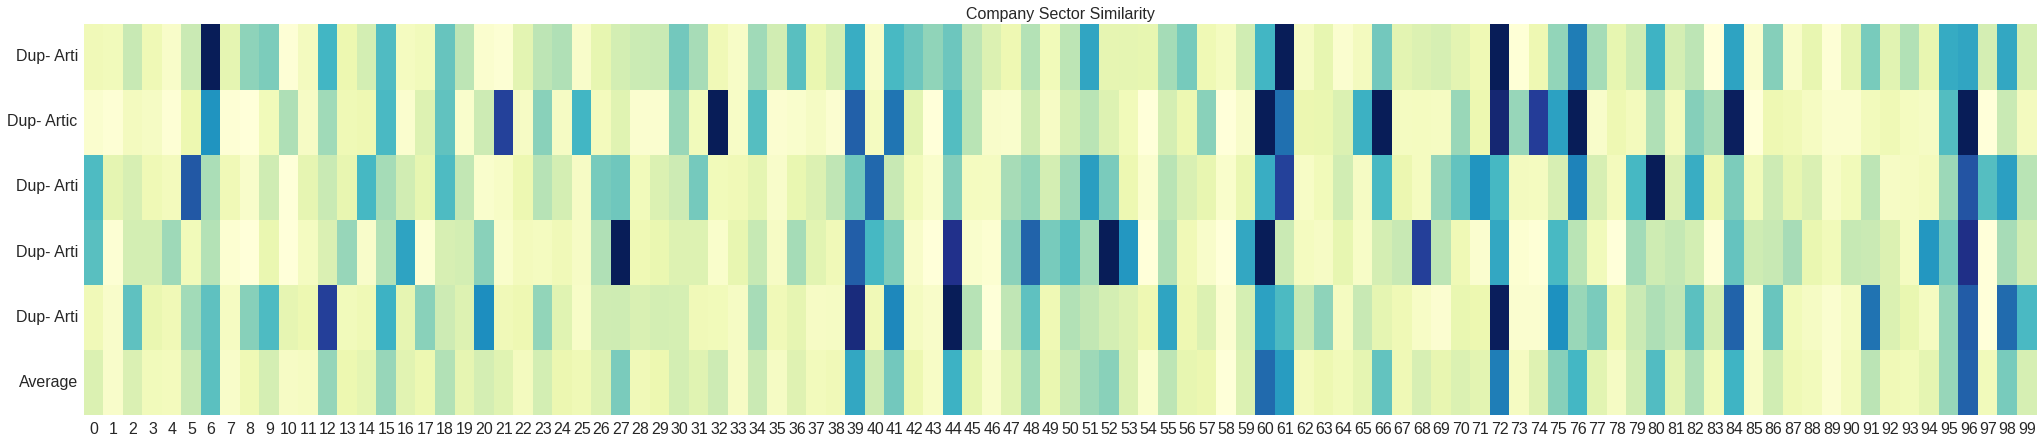

In [8]:
# Test visualization

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
n_topics=100

#Trained
#companies = [ (0, 70), (0, 80) ]  #Unrelated
#companies = [ (0, 100), (0, 194), (0, 192) ]  # Related Banks
#Test
companies = []
for i in range(0,5):
    companies.append((1,i))

topic_vectors = np.zeros([len(companies)+1,n_topics])
labels,i = [],0
for (s, num) in companies:
  by_topic=dat['doc_topic_dists'] if s==0 else doc_to_topic
  topic_vectors[i] = (by_topic[num])
  labels.append(names[num][:-4] if s==0 else test_names[num][:-4])  
  i+=1
    
av_by_topic = np.array( topic_vectors ).mean( axis=0 )
topic_vectors[i] = av_by_topic
labels.append("Average")

# doc_sim_list = []
# for j in range(503):
#     doc_topicav_sim = scipy.spatial.distance.cosine(dat['doc_topic_dists'][j],av_by_topic)
#     doc_sim_list += [(j,names[j],doc_topicav_sim)]
    
# sorted_docs_by_average = sorted(doc_sim_list, key=lambda x: x[2])
# similar_docs = [sorted_docs_by_average[idx] for idx in range(2)] 
# print similar_docs
# for doc in similar_docs:
#     i+=1
#     topic_vectors[i] = dat['doc_topic_dists'][doc[0]]
#     labels.append(doc[1])
    
    
# doc_sim_list = []
# for j in range(503):
#     doc_topicav_sim = abs(dat['doc_topic_dists'][j,20]-av_by_topic[20])
#     doc_sim_list += [(j,names[j],doc_topicav_sim)]
    
# sorted_docs_by_average = sorted(doc_sim_list, key=lambda x: x[2])
# similar_docs = [sorted_docs_by_average[idx] for idx in range(2)] 

# for doc in similar_docs:
#     i+=1
#     topic_vectors[i] = dat['doc_topic_dists'][doc[0]]
#     labels.append(doc[1])


plt.rcParams['figure.figsize']=(35,7)
ax = plt.axes()

rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(**rc)

sns.heatmap(topic_vectors,cmap="YlGnBu",yticklabels=labels,robust=True,cbar=False)
ax.set_title('Company Sector Similarity')
plt.show()

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


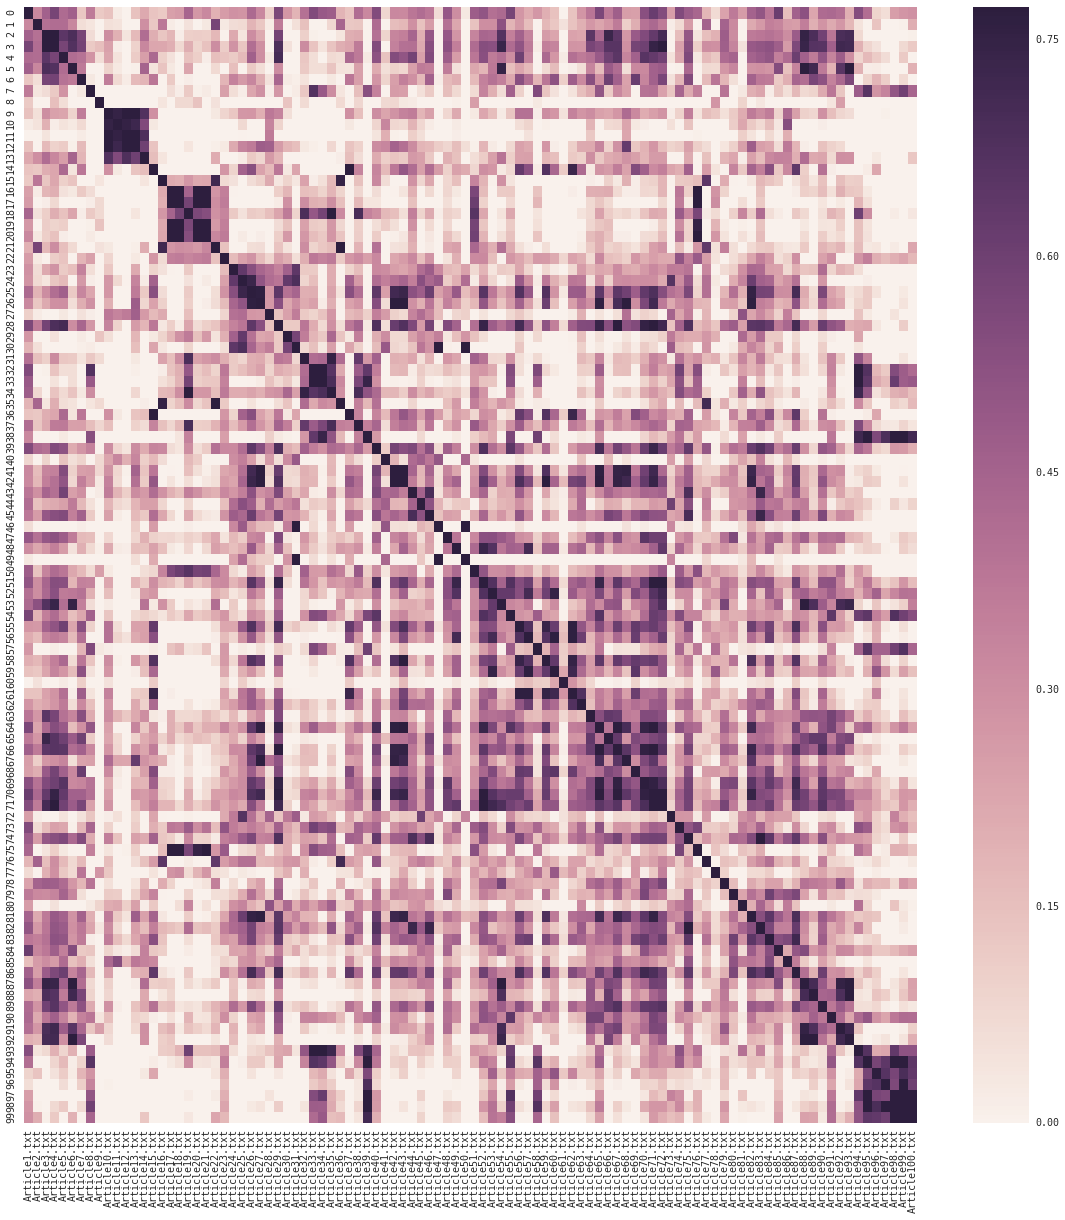

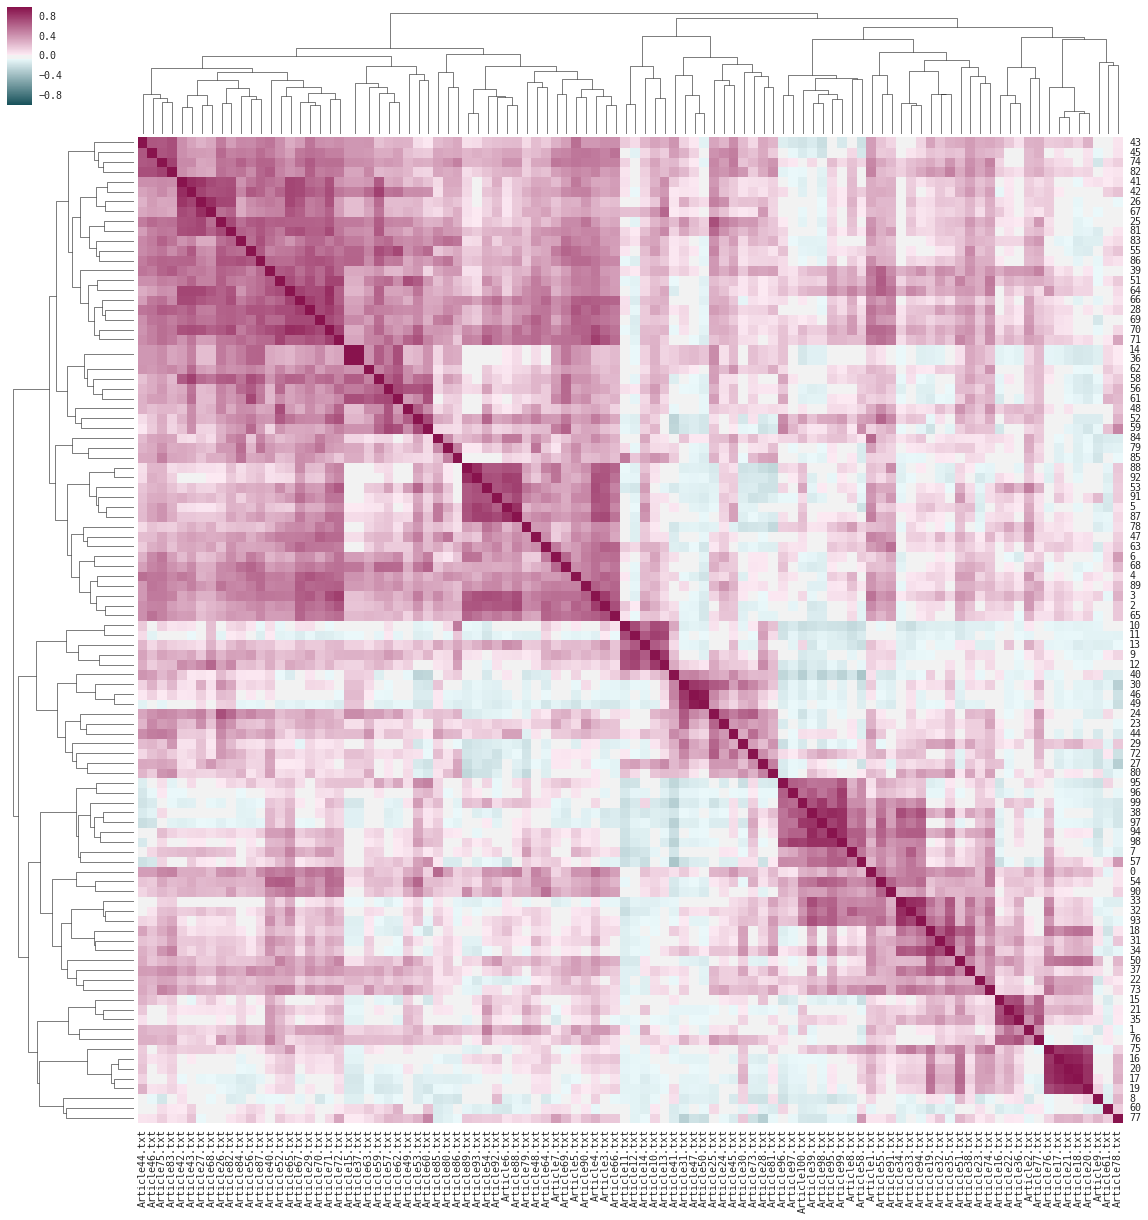

In [86]:
article_sim_matrix = np.zeros((len(doc_to_topic),len(doc_to_topic)))
for i in range(len(doc_to_topic)):
    for j in range(len(doc_to_topic)):
        article_sim_matrix[i,j] = 1-scipy.spatial.distance.correlation(doc_to_topic[i],doc_to_topic[j])
# for i in range(len(doc_to_topic)):
#     article_sim_matrix[i,i] = 1
        
df = pd.DataFrame(article_sim_matrix[0:100,0:100], columns=test_names[0:100])
sns.set(font="monospace")

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
plt.rcParams['figure.figsize']=(20,20)
ax = plt.axes()
sns.heatmap(df,robust = True,vmin=0)
sns.clustermap(df,figsize=(20, 20), cmap=cmap)

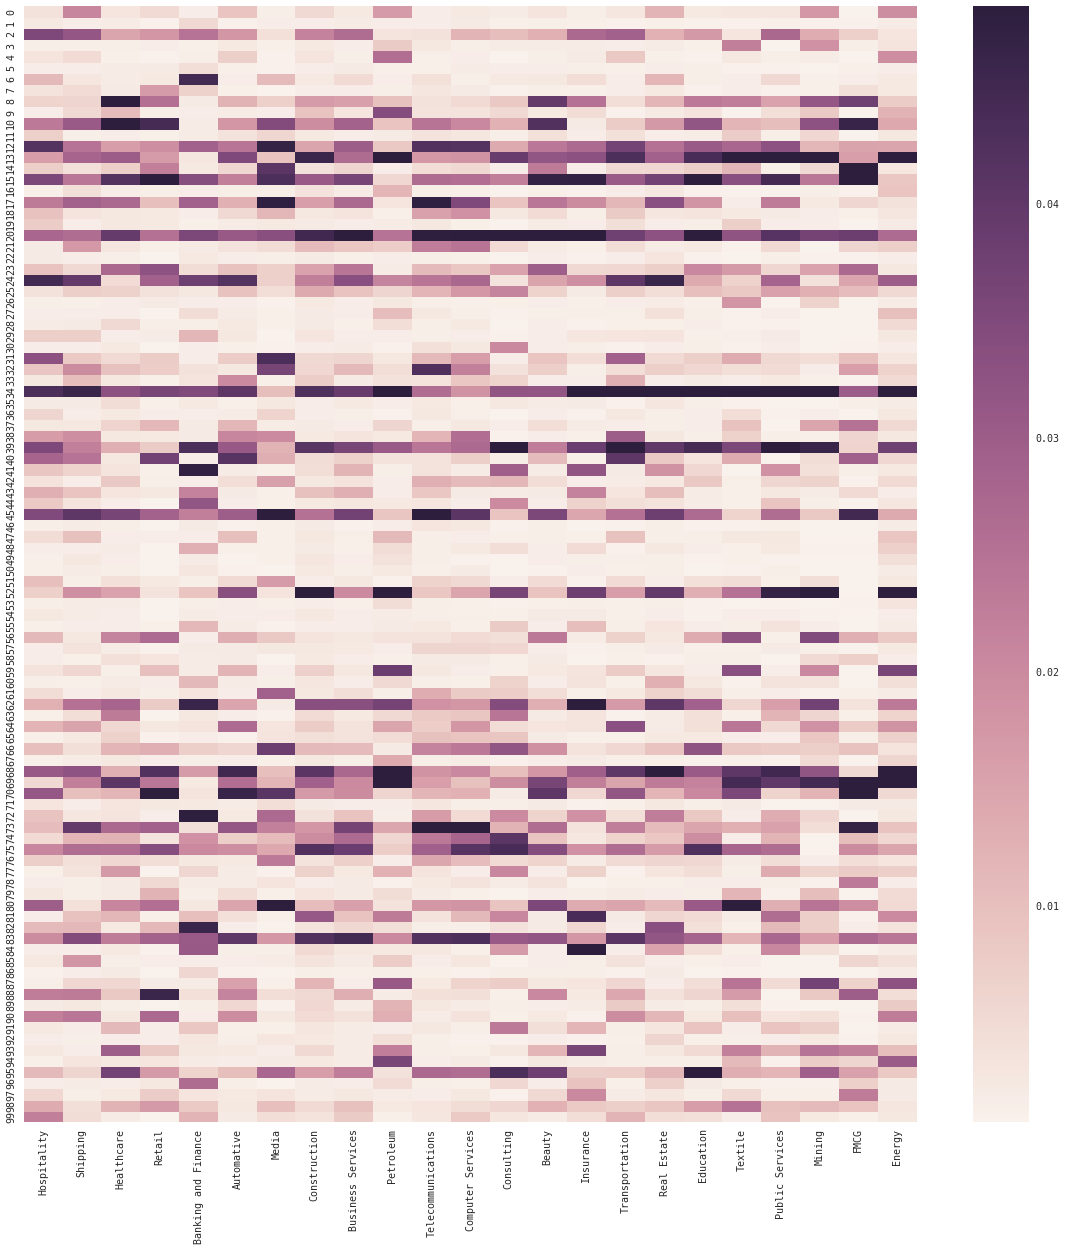

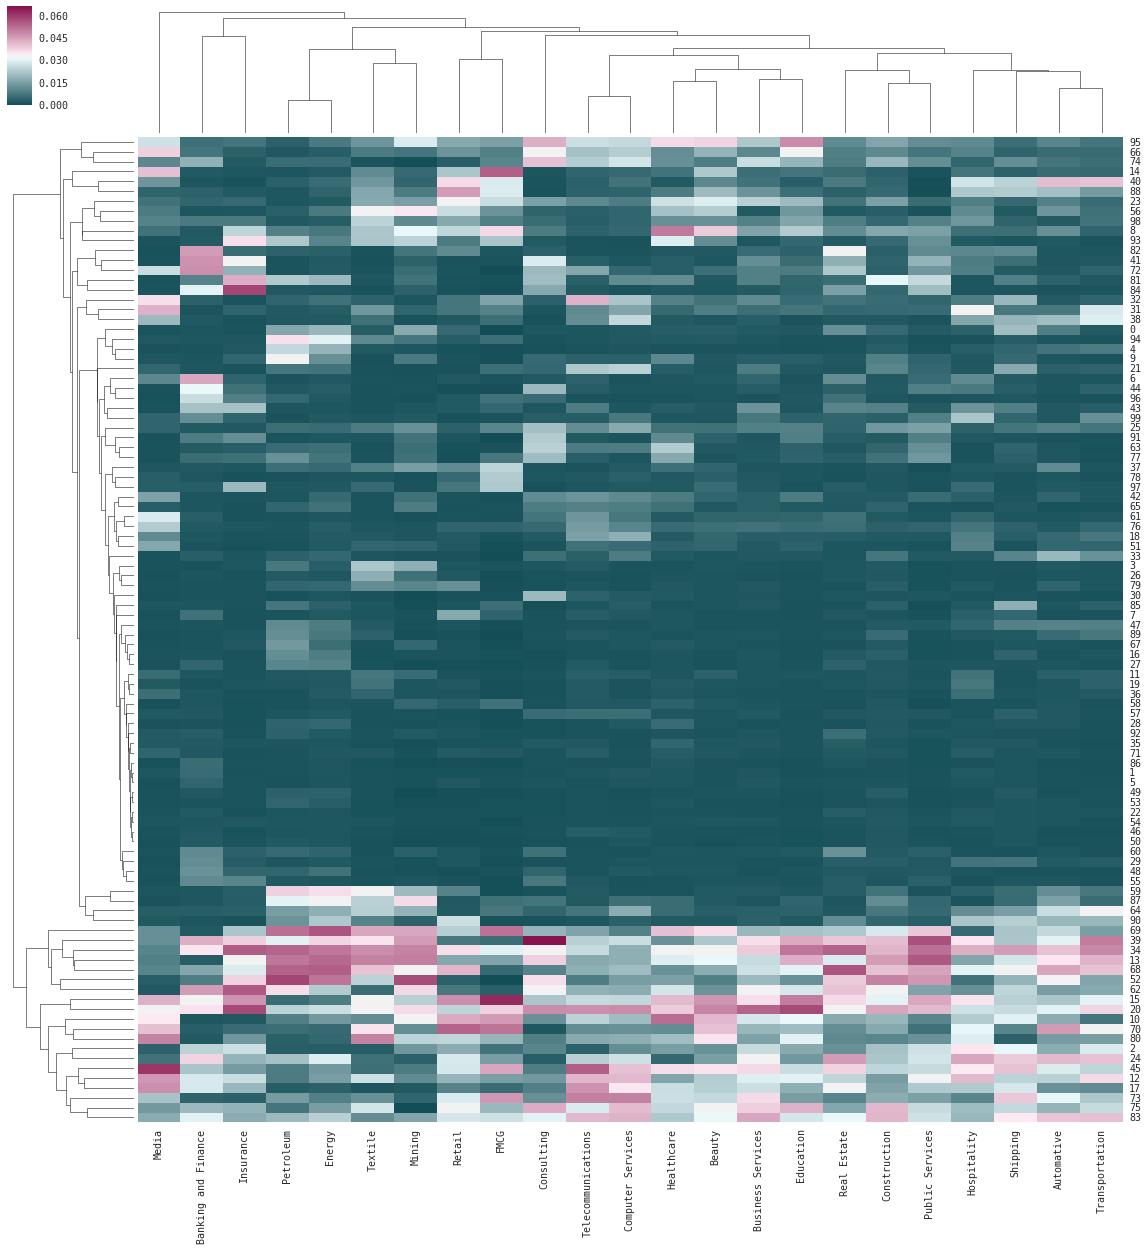

In [9]:
# Sort sectors by topic
sector_list = []

topic_sector_matrix = np.transpose(dat['doc_topic_dists'][503:526])
df = pd.DataFrame(topic_sector_matrix, columns=names[503:526])
sns.set(font="monospace")


# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
plt.rcParams['figure.figsize']=(20,20)
ax = plt.axes()

# Draw the full plot
# sns.clustermap(df, row_colors=network_colors, linewidths=.5,
#                col_colors=network_colors, figsize=(13, 13), cmap=cmap)
sns.heatmap(df,robust=True)
sns.clustermap(df,figsize=(20, 20), cmap=cmap)

## Automatic labeling of topic models 
# Heatmap generation

import seaborn as sns
import matplotlib.pyplot as plt

c1 = 134
c2 = 447
row_idx = np.array([c1,c2])
print dat['doc_topic_dists'][row_idx[:]]
plt.rcParams['figure.figsize']=(30,10)
ax = plt.axes()


if c1<357:
    c1_name = names[c1+1][:-4]
elif c1>357:
    c1_name = names[c1][:-4]
    
if c2<357:
    c2_name = names[c2+1][:-4]
elif c2>357:
    c2_name = names[c2][:-4]


sns.heatmap(dat['doc_topic_dists'][row_idx[:]],cmap="YlGnBu",yticklabels=[c1_name,c2_name])
ax.set_title('Company Sector Similarity')
plt.show()

print dat['doc_topic_dists'][447]

<Container object of 100 artists>

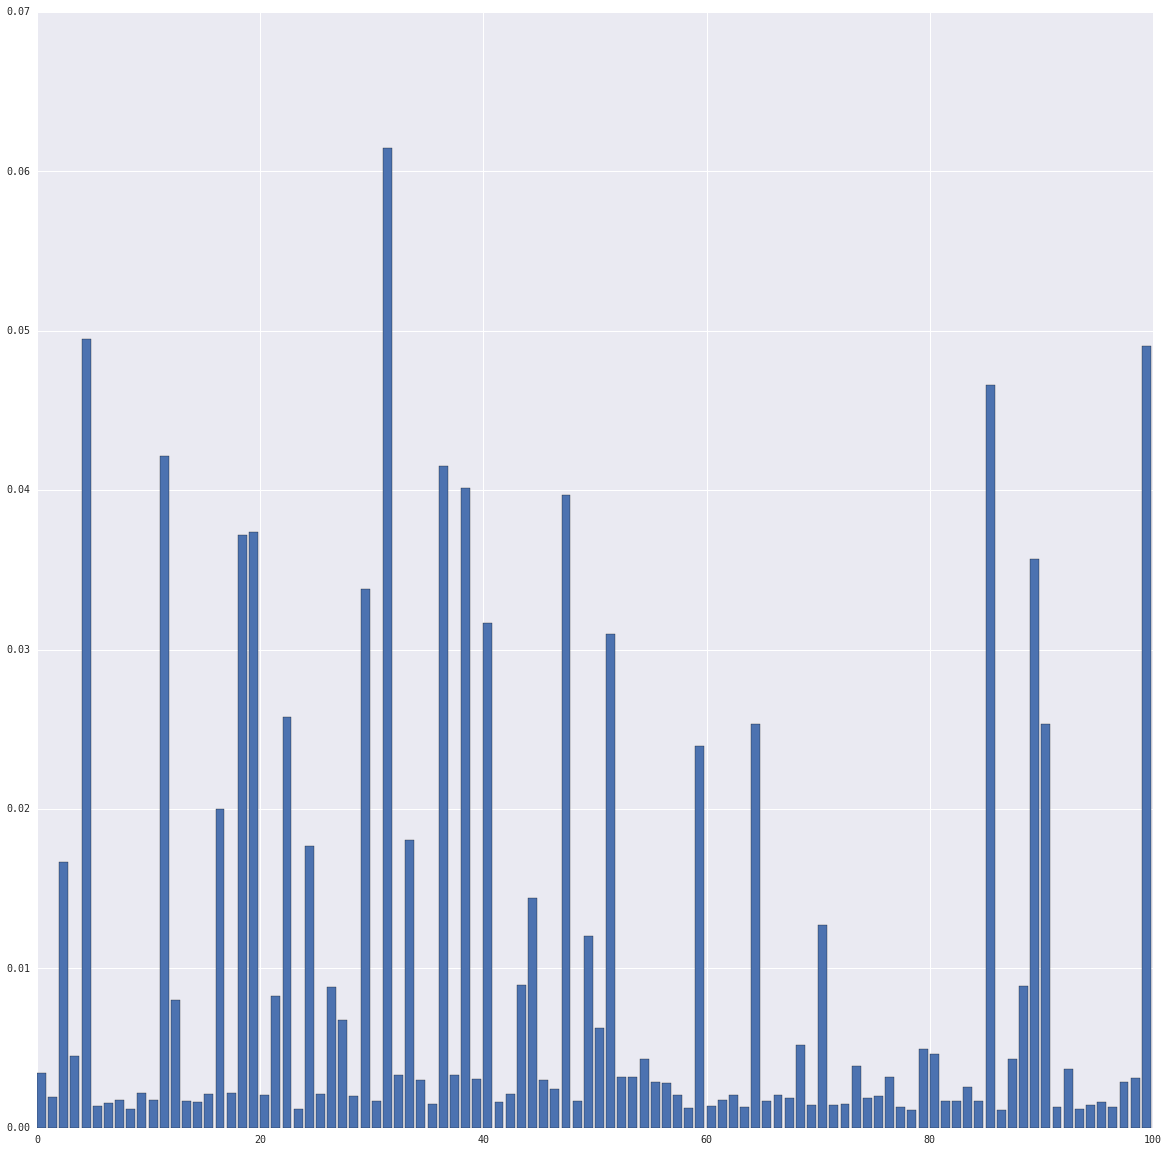

In [10]:
plt.bar(np.arange(100), dat['doc_topic_dists'][447])

In [26]:
from openpyxl import Workbook, load_workbook
#pyLDAvis.enable_notebook()

wb = load_workbook(filename = 'testdata/GICS_map2014.xlsx')
sheet_list = wb['Descriptions']
file_ob = open("Description.txt",'a')
for i in range(6,346,2):
    s = 'H' + str(i)
    s1 = 'H' + str(i+1)
    print(sheet_list[s].value + ": " + sheet_list[s1].value) 
    file_ob.write(sheet_list[s].value + ": " + sheet_list[s1].value + "\n")
file_ob.close()

sector_dict = {}

with open("Description.txt") as f:
    content = f.readlines()
    for line in content:
        div = line.split(": ",1)
        sector_dict[div[0].lower()] = div[1].replace("\n","")
        
print len(sector_dict)
# dictionary = corpora.Dictionary(texts)
# dictionary.save('sector.dict')
# # print(dictionary.token2id)
# corpus = [dictionary.doc2bow(text) for text in texts]
# corpora.MmCorpus.serialize('corpus.mm', corpus) # store to disk, for later use
# # print(corpus)
# lsi = models.lsimodel.LsiModel(corpus=corpus, id2word=dictionary, num_topics=170)
# lsi.print_topics(10)
# lda = models.ldamodel.LdaModel(corpus, num_topics=170)
# for i in lda.show_topics(len(dictionary)):
#     print i
# print dictionary.id2word(3)

Oil & Gas Drilling: Drilling contractors or owners of drilling rigs that contract their services for drilling wells
Oil & Gas Equipment & Services: Manufacturers of equipment, including drilling rigs and equipment, and providers of supplies and services to companies involved in the drilling, evaluation and completion of oil and gas wells.
Integrated Oil & Gas: Integrated oil companies engaged in the exploration & production of oil and gas, as well as at least one other significant activity in either refining, marketing and transportation, or chemicals.
Oil & Gas Exploration & Production: Companies engaged in the exploration and production of oil and gas not classified elsewhere.
Oil & Gas Refining & Marketing: Companies engaged in the refining and marketing of oil, gas and/or refined products not classified in the Integrated Oil & Gas or Independent Power Producers & Energy Traders Sub-Industries.
Oil & Gas Storage & Transportation: Companies engaged in the storage and/or transportatio

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/openpyxl/reader/worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
